In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import datetime
import os

from matplotlib.ticker import FuncFormatter
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from os import path
from matplotlib import ticker

In [2]:
def prep (x, interval_stat):
    
    x['interval'] = np.ceil(x['epsiode']/interval_stat)
    x_rewards = x.groupby(['interval'], as_index=False).agg({'rewards':np.mean,'timesteps':np.mean})
    x_rewards['timesteps'] = (x_rewards['timesteps'] - 1)
    x_rewards.columns = ['interval', 'valid_actions_mean','rewards_mean']
    x_conv = x[x['timesteps']==20].groupby(['interval'], as_index=False).agg({'timesteps':np.size})
    x_conv.columns = ['interval', 'conv_episodes']
    x_stat = pd.merge(x_rewards, x_conv, on='interval', how='left')
    x_stat = x_stat.fillna(0)
    x_stat['conv_episodes_cum'] = x_stat['conv_episodes'].cumsum()
    
    return x_stat

def data_process(Approximation_threshold, rangelist, interval_stat):
    
    df_e_stat = pd.DataFrame()
    df_e_fm_stat = pd.DataFrame()
    df_b_stat = pd.DataFrame()
    df_b_fm_stat = pd.DataFrame()
    df_e_dql_stat = pd.DataFrame()
    df_e_dql_fm_stat = pd.DataFrame()
    df_b_dql_stat = pd.DataFrame()
    df_b_dql_fm_stat = pd.DataFrame()
    df_e_lda_stat = pd.DataFrame()
    df_e_lda_fm_stat = pd.DataFrame()
    df_b_lda_stat = pd.DataFrame()
    df_b_lda_fm_stat = pd.DataFrame()
    df_e_dynaq_stat = pd.DataFrame()
    df_e_dynaq_fm_stat = pd.DataFrame()
    df_b_dynaq_stat = pd.DataFrame()
    df_b_dynaq_fm_stat = pd.DataFrame()
    
    df_e_sql_stat = pd.DataFrame()
    df_e_sql_fm_stat = pd.DataFrame()
    df_b_sql_stat = pd.DataFrame()
    df_b_sql_fm_stat = pd.DataFrame()
    
    for i in rangelist:
        f_e = str(Approximation_threshold)+'/QL_100000_egreedy_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_e_fm = str(Approximation_threshold)+'/QL_100000_egreedy_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b = str(Approximation_threshold)+'/QL_100000_boltzmann_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_fm = str(Approximation_threshold)+'/QL_100000_boltzmann_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_e_dql = str(Approximation_threshold)+'/DQL_100000_egreedy_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_e_dql_fm = str(Approximation_threshold)+'/DQL_100000_egreedy_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_dql = str(Approximation_threshold)+'/DQL_100000_boltzmann_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_dql_fm = str(Approximation_threshold)+'/DQL_100000_boltzmann_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_e_lda = str(Approximation_threshold)+'/QlL_100000_egreedy_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_e_lda_fm = str(Approximation_threshold)+'/QlL_100000_egreedy_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_lda = str(Approximation_threshold)+'/QlL_100000_boltzmann_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_lda_fm = str(Approximation_threshold)+'/QlL_100000_boltzmann_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'

        f_e_sql = str(Approximation_threshold)+'/SQL_100000_egreedy_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_e_sql_fm = str(Approximation_threshold)+'/SQL_100000_egreedy_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_sql = str(Approximation_threshold)+'/SQL_100000_boltzmann_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_sql_fm = str(Approximation_threshold)+'/SQL_100000_boltzmann_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        
        
        df_e = pd.read_table(f_e, sep=',')
        df_e_fm = pd.read_table(f_e_fm, sep=',')
        df_b = pd.read_table(f_b, sep=',')
        df_b_fm = pd.read_table(f_b_fm, sep=',')
        df_e_dql = pd.read_table(f_e_dql, sep=',')
        df_e_dql_fm = pd.read_table(f_e_dql_fm, sep=',')
        df_b_dql = pd.read_table(f_b_dql, sep=',')
        df_b_dql_fm = pd.read_table(f_b_dql_fm, sep=',')
        df_e_lda = pd.read_table(f_e_lda, sep=',')
        df_e_lda_fm = pd.read_table(f_e_lda_fm, sep=',')
        df_b_lda = pd.read_table(f_b_lda, sep=',')
        df_b_lda_fm = pd.read_table(f_b_lda_fm, sep=',')

        df_e_sql = pd.read_table(f_e_sql, sep=',')
        df_e_sql_fm = pd.read_table(f_e_sql_fm, sep=',')
        df_b_sql = pd.read_table(f_b_sql, sep=',')
        df_b_sql_fm = pd.read_table(f_b_sql_fm, sep=',')

        f_e_dynaq = str(Approximation_threshold)+'/DynaQ_100000_egreedy_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_e_dynaq_fm = str(Approximation_threshold)+'/DynaQ_100000_egreedy_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_dynaq = str(Approximation_threshold)+'/DynaQ_100000_boltzmann_FMoff_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        f_b_dynaq_fm = str(Approximation_threshold)+'/DynaQ_100000_boltzmann_FMon_mu'+str(Approximation_threshold)+'_seed'+str(i)+'.txt'
        df_e_dynaq = pd.read_table(f_e_dynaq, sep=',')
        df_e_dynaq_fm = pd.read_table(f_e_dynaq_fm, sep=',')
        df_b_dynaq = pd.read_table(f_b_dynaq, sep=',')
        df_b_dynaq_fm = pd.read_table(f_b_dynaq_fm, sep=',')
        
        df_e = prep(df_e,interval_stat)
        df_e_fm =prep(df_e_fm,interval_stat)
        df_b = prep(df_b, interval_stat)
        df_b_fm = prep(df_b_fm, interval_stat)
        df_e_dql = prep(df_e_dql, interval_stat)
        df_e_dql_fm =prep(df_e_dql_fm, interval_stat)
        df_b_dql = prep(df_b_dql, interval_stat)
        df_b_dql_fm =prep(df_b_dql_fm, interval_stat)
        df_e_lda = prep(df_e_lda, interval_stat)
        df_e_lda_fm =prep(df_e_lda_fm, interval_stat)
        df_b_lda = prep(df_b_lda, interval_stat)
        df_b_lda_fm =prep(df_b_lda_fm, interval_stat)

        df_e_dynaq = prep(df_e_dynaq, interval_stat)
        df_e_dynaq_fm =prep(df_e_dynaq_fm, interval_stat)
        df_b_dynaq = prep(df_b_dynaq, interval_stat)
        df_b_dynaq_fm =prep(df_b_dynaq_fm, interval_stat)      
        
        df_e_sql = prep(df_e_sql, interval_stat)
        df_e_sql_fm =prep(df_e_sql_fm, interval_stat)
        df_b_sql = prep(df_b_sql, interval_stat)
        df_b_sql_fm =prep(df_b_sql_fm, interval_stat)
        
        if i==0:
            df_e_stat = df_e
            df_e_fm_stat = df_e_fm
            df_b_stat = df_b
            df_b_fm_stat = df_b_fm
            df_e_dql_stat = df_e_dql
            df_e_dql_fm_stat = df_e_dql_fm
            df_b_dql_stat = df_b_dql
            df_b_dql_fm_stat = df_b_dql_fm
            df_e_lda_stat = df_e_lda
            df_e_lda_fm_stat = df_e_lda_fm
            df_b_lda_stat = df_b_lda
            df_b_lda_fm_stat = df_b_lda_fm     
            
            df_e_dynaq_stat = df_e_dynaq
            df_e_dynaq_fm_stat = df_e_dynaq_fm
            df_b_dynaq_stat = df_b_dynaq
            df_b_dynaq_fm_stat = df_b_dynaq_fm 
            
            df_e_sql_stat = df_e_sql
            df_e_sql_fm_stat = df_e_sql_fm
            df_b_sql_stat = df_b_sql
            df_b_sql_fm_stat = df_b_sql_fm   
            
        df_e_stat = df_e_stat.append(df_e)
        df_e_fm_stat = df_e_fm_stat.append(df_e_fm)
        df_b_stat = df_b_stat.append(df_b)
        df_b_fm_stat = df_b_fm_stat.append(df_b_fm)
        df_e_dql_stat = df_e_dql_stat.append(df_e_dql)
        df_e_dql_fm_stat = df_e_dql_fm_stat.append(df_e_dql_fm)
        df_b_dql_stat = df_b_dql_stat.append(df_b_dql)
        df_b_dql_fm_stat = df_b_dql_fm_stat.append(df_b_dql_fm)  
        df_e_lda_stat = df_e_lda_stat.append(df_e_lda)
        df_e_lda_fm_stat = df_e_lda_fm_stat.append(df_e_lda_fm)
        df_b_lda_stat = df_b_lda_stat.append(df_b_lda)
        df_b_lda_fm_stat = df_b_lda_fm_stat.append(df_b_lda_fm)
        
        df_e_dynaq_stat = df_e_dynaq_stat.append(df_e_dynaq)
        df_e_dynaq_fm_stat = df_e_dynaq_fm_stat.append(df_e_dynaq_fm)
        df_b_dynaq_stat = df_b_dynaq_stat.append(df_b_dynaq)
        df_b_dynaq_fm_stat = df_b_dynaq_fm_stat.append(df_b_dynaq_fm)  
        
        df_e_sql_stat = df_e_sql_stat.append(df_e_sql)
        df_e_sql_fm_stat = df_e_sql_fm_stat.append(df_e_sql_fm)
        df_b_sql_stat = df_b_sql_stat.append(df_b_sql)
        df_b_sql_fm_stat = df_b_sql_fm_stat.append(df_b_sql_fm)      
        
    df_b_stat_gb = df_b_stat.groupby(['interval'], as_index=False).mean()
    df_b_fm_stat_gb = df_b_fm_stat.groupby(['interval'], as_index=False).mean()
    df_e_stat_gb = df_e_stat.groupby(['interval'], as_index=False).mean()
    df_e_fm_stat_gb = df_e_fm_stat.groupby(['interval'], as_index=False).mean()
    df_e_dql_stat_gb = df_e_dql_stat.groupby(['interval'], as_index=False).mean()
    df_e_dql_fm_stat_gb = df_e_dql_fm_stat.groupby(['interval'], as_index=False).mean()
    df_b_dql_stat_gb = df_b_dql_stat.groupby(['interval'], as_index=False).mean()
    df_b_dql_fm_stat_gb = df_b_dql_fm_stat.groupby(['interval'], as_index=False).mean()
    df_e_lda_stat_gb = df_e_lda_stat.groupby(['interval'], as_index=False).mean()
    df_e_lda_fm_stat_gb = df_e_lda_fm_stat.groupby(['interval'], as_index=False).mean()
    df_b_lda_stat_gb = df_b_lda_stat.groupby(['interval'], as_index=False).mean()
    df_b_lda_fm_stat_gb = df_b_lda_fm_stat.groupby(['interval'], as_index=False).mean()
    
    df_e_dynaq_stat_gb = df_e_dynaq_stat.groupby(['interval'], as_index=False).mean()
    df_e_dynaq_fm_stat_gb = df_e_dynaq_fm_stat.groupby(['interval'], as_index=False).mean()
    df_b_dynaq_stat_gb = df_b_dynaq_stat.groupby(['interval'], as_index=False).mean()
    df_b_dynaq_fm_stat_gb = df_b_dynaq_fm_stat.groupby(['interval'], as_index=False).mean()  
    
    df_e_sql_stat_gb = df_e_sql_stat.groupby(['interval'], as_index=False).mean()
    df_e_sql_fm_stat_gb = df_e_sql_fm_stat.groupby(['interval'], as_index=False).mean()
    df_b_sql_stat_gb = df_b_sql_stat.groupby(['interval'], as_index=False).mean()
    df_b_sql_fm_stat_gb = df_b_sql_fm_stat.groupby(['interval'], as_index=False).mean() 
    
    df_b_total = pd.merge(df_b_stat_gb, df_b_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_b_total['exploration']='Boltzmann'
    df_b_total['at']=Approximation_threshold
    df_b_total['approach']='QL'
    df_e_total = pd.merge(df_e_stat_gb, df_e_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_e_total['exploration']='egreedy'
    df_e_total['at']=Approximation_threshold
    df_e_total['approach']='QL'

    df_e_dql_total = pd.merge(df_e_dql_stat_gb, df_e_dql_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_e_dql_total['exploration']='egreedy'
    df_e_dql_total['at']=Approximation_threshold
    df_e_dql_total['approach']='DQL' 
    df_b_dql_total = pd.merge(df_b_dql_stat_gb, df_b_dql_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_b_dql_total['exploration']='Boltzmann'
    df_b_dql_total['at']=Approximation_threshold
    df_b_dql_total['approach']='DQL'   
    
    df_e_lda_total = pd.merge(df_e_lda_stat_gb, df_e_lda_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_e_lda_total['exploration']='egreedy'
    df_e_lda_total['at']=Approximation_threshold
    df_e_lda_total['approach']='QlL'  
    df_b_lda_total = pd.merge(df_b_lda_stat_gb, df_b_lda_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_b_lda_total['exploration']='Boltzmann'
    df_b_lda_total['at']=Approximation_threshold
    df_b_lda_total['approach']='QlL'
    df_e_dynaq_total = pd.merge(df_e_dynaq_stat_gb, df_e_dynaq_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_e_dynaq_total['exploration']='egreedy'
    df_e_dynaq_total['at']=Approximation_threshold
    df_e_dynaq_total['approach']='DynaQ'  
    df_b_dynaq_total = pd.merge(df_b_dynaq_stat_gb, df_b_dynaq_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_b_dynaq_total['exploration']='Boltzmann'
    df_b_dynaq_total['at']=Approximation_threshold
    df_b_dynaq_total['approach']='DynaQ'  
    
    df_e_sql_total = pd.merge(df_e_sql_stat_gb, df_e_sql_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_e_sql_total['exploration']='egreedy'
    df_e_sql_total['at']=Approximation_threshold
    df_e_sql_total['approach']='SQL' 
    df_b_sql_total = pd.merge(df_b_sql_stat_gb, df_b_sql_fm_stat_gb, suffixes=['','_fm'], on='interval')
    df_b_sql_total['exploration']='Boltzmann'
    df_b_sql_total['at']=Approximation_threshold
    df_b_sql_total['approach']='SQL'
    
    return df_b_total,df_e_total,df_b_dql_total,df_e_dql_total,df_b_lda_total,df_e_lda_total,df_b_dynaq_total,df_e_dynaq_total,df_b_sql_total,df_e_sql_total

# 表格统计

## interval_stat = 1000

In [3]:
rangelist = {45, 48, 65, 68, 10, 84, 22, 37, 88,2733, 9846, 3265, 4860, 9226, 7892, 4374, 5875, 6745, 3469}
interval_stat = 1000

Approximation_threshold = 0.01
b_01,e_01,b_dql_01,e_dql_01,b_lda_01,e_lda_01,b_dynaq_01,e_dynaq_01,b_sql_01,e_sql_01 = data_process(Approximation_threshold, rangelist,interval_stat)

Approximation_threshold = 0.02
b_02,e_02,b_dql_02,e_dql_02,b_lda_02,e_lda_02,b_dynaq_02,e_dynaq_02,b_sql_02,e_sql_02 = data_process(Approximation_threshold, rangelist,interval_stat)

Approximation_threshold = 0.03
b_03,e_03,b_dql_03,e_dql_03,b_lda_03,e_lda_03,b_dynaq_03,e_dynaq_03,b_sql_03,e_sql_03 = data_process(Approximation_threshold, rangelist,interval_stat)

Approximation_threshold = 0.04
b_04,e_04,b_dql_04,e_dql_04,b_lda_04,e_lda_04,b_dynaq_04,e_dynaq_04,b_sql_04,e_sql_04 = data_process(Approximation_threshold, rangelist,interval_stat)

Approximation_threshold = 0.05
b_05,e_05,b_dql_05,e_dql_05,b_lda_05,e_lda_05,b_dynaq_05,e_dynaq_05,b_sql_05,e_sql_05 = data_process(Approximation_threshold, rangelist,interval_stat)

Tb = pd.concat([b_01,b_02,b_03,b_04,b_05,e_01,e_02,e_03,e_04,e_05,
               b_dql_01,b_dql_02,b_dql_03,b_dql_04,b_dql_05,e_dql_01,e_dql_02,e_dql_03,e_dql_04,e_dql_05,
               b_lda_01,b_lda_02,b_lda_03,b_lda_04,b_lda_05,e_lda_01,e_lda_02,e_lda_03,e_lda_04,e_lda_05,
               b_dynaq_01,b_dynaq_02,b_dynaq_03,b_dynaq_04,b_dynaq_05,e_dynaq_01,e_dynaq_02,e_dynaq_03,e_dynaq_04,e_dynaq_05,
               b_sql_01,b_sql_02,b_sql_03,b_sql_04,b_sql_05,e_sql_01,e_sql_02,e_sql_03,e_sql_04,e_sql_05])

index_1 = 'conv_episodes_cum'
index_2 = 'conv_episodes_cum_fm'
index_3 = 'valid_actions_mean'
index_4 = 'valid_actions_mean_fm'
index_5 = 'rewards_mean'
index_6 = 'rewards_mean_fm'
Table = Tb.groupby(['interval','exploration', 'approach'], as_index=False).agg({index_1:np.mean,index_2:np.mean,
                                                                    index_3:np.mean,index_4:np.mean,
                                                                    index_5:np.mean, index_6:np.mean})
avg_at = Tb.groupby(['interval','at'], as_index=False).agg({index_1:np.mean,index_2:np.mean,
                                                                    index_3:np.mean,index_4:np.mean,
                                                                    index_5:np.mean, index_6:np.mean})

In [4]:
Table[Table['interval']==(100000/interval_stat)].pivot_table(values=[index_1, index_2, index_5, index_6], index=['exploration'], columns=['approach'])

conv_episodes_cum                                                  \
approach                  DQL       DynaQ          QL         QlL         SQL   
exploration                                                                     
Boltzmann          340.631579  357.421053  367.842105  374.000000  365.631579   
egreedy             56.842105   64.947368   54.631579   57.157895   68.789474   

            conv_episodes_cum_fm                                      \
approach                     DQL       DynaQ          QL         QlL   
exploration                                                            
Boltzmann             824.852632  702.694737  774.136842  718.663158   
egreedy               479.052632  471.515789  480.768421  464.178947   

                        rewards_mean                                   \
approach            SQL          DQL      DynaQ         QL        QlL   
exploration                                                             
Boltzmann    699.115789    -0.510105  -1.806316  -0.590526   0.017895   
egreedy      522.094737   -12.602105 -10.263368 -12.141053 -11.900632   

                      rewards_mean_fm                                   \
approach          SQL             DQL      DynaQ         QL        QlL   
exploration                                                              
Boltzmann    1.150526       14.254863  13.163074  11.912505  10.421642   
egreedy     -8.883789        9.393137   9.245726   8.514316   7.262568   

                        
approach           SQL  
exploration             
Boltzmann    14.113642  
egreedy      14.388000

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

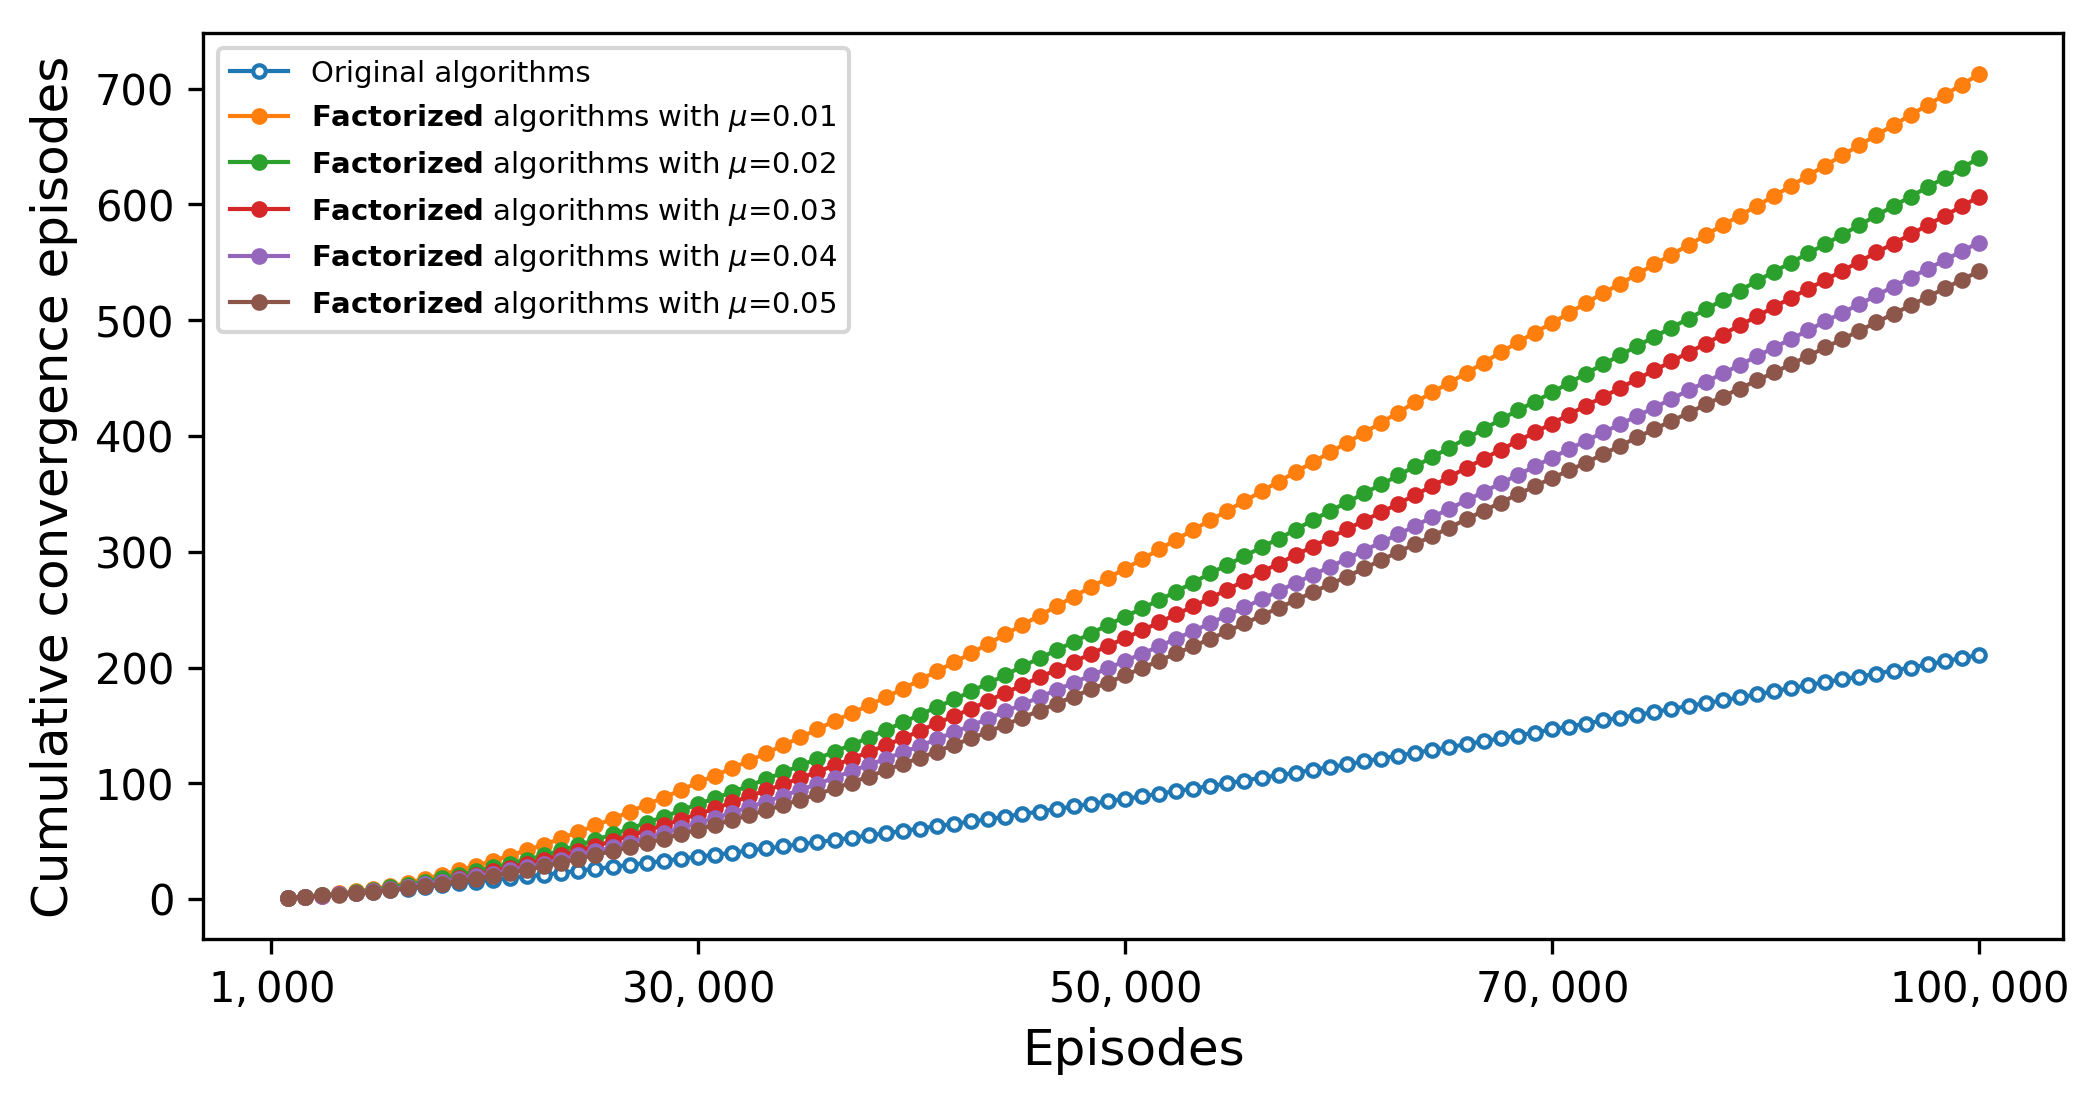

In [6]:
### Boltzmann
fig, ax1 = plt.subplots()
title_1 = 'conv_episodes_cum'
title_2 = 'conv_episodes_cum_fm'

ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])

avg_01 = avg_at[avg_at['at']==0.01]
avg_02 = avg_at[avg_at['at']==0.02]
avg_03 = avg_at[avg_at['at']==0.03]
avg_04 = avg_at[avg_at['at']==0.04]
avg_05 = avg_at[avg_at['at']==0.05]

ax1.plot(avg_01['interval'], avg_01[title_1], linewidth=1,marker='o', markersize=3,markerfacecolor='white',label='Original algorithms')
ax1.plot(avg_01['interval'], avg_01[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.01')
ax1.plot(avg_02['interval'], avg_02[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.02')
ax1.plot(avg_03['interval'], avg_03[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.03')
ax1.plot(avg_04['interval'], avg_04[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.04')
ax1.plot(avg_05['interval'], avg_05[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.05')

ax1.legend(prop={'size': 7},loc=2,ncol=1,numpoints = 1)
# plt.savefig('./CCE_AT.eps',dpi=300) 
plt.show()

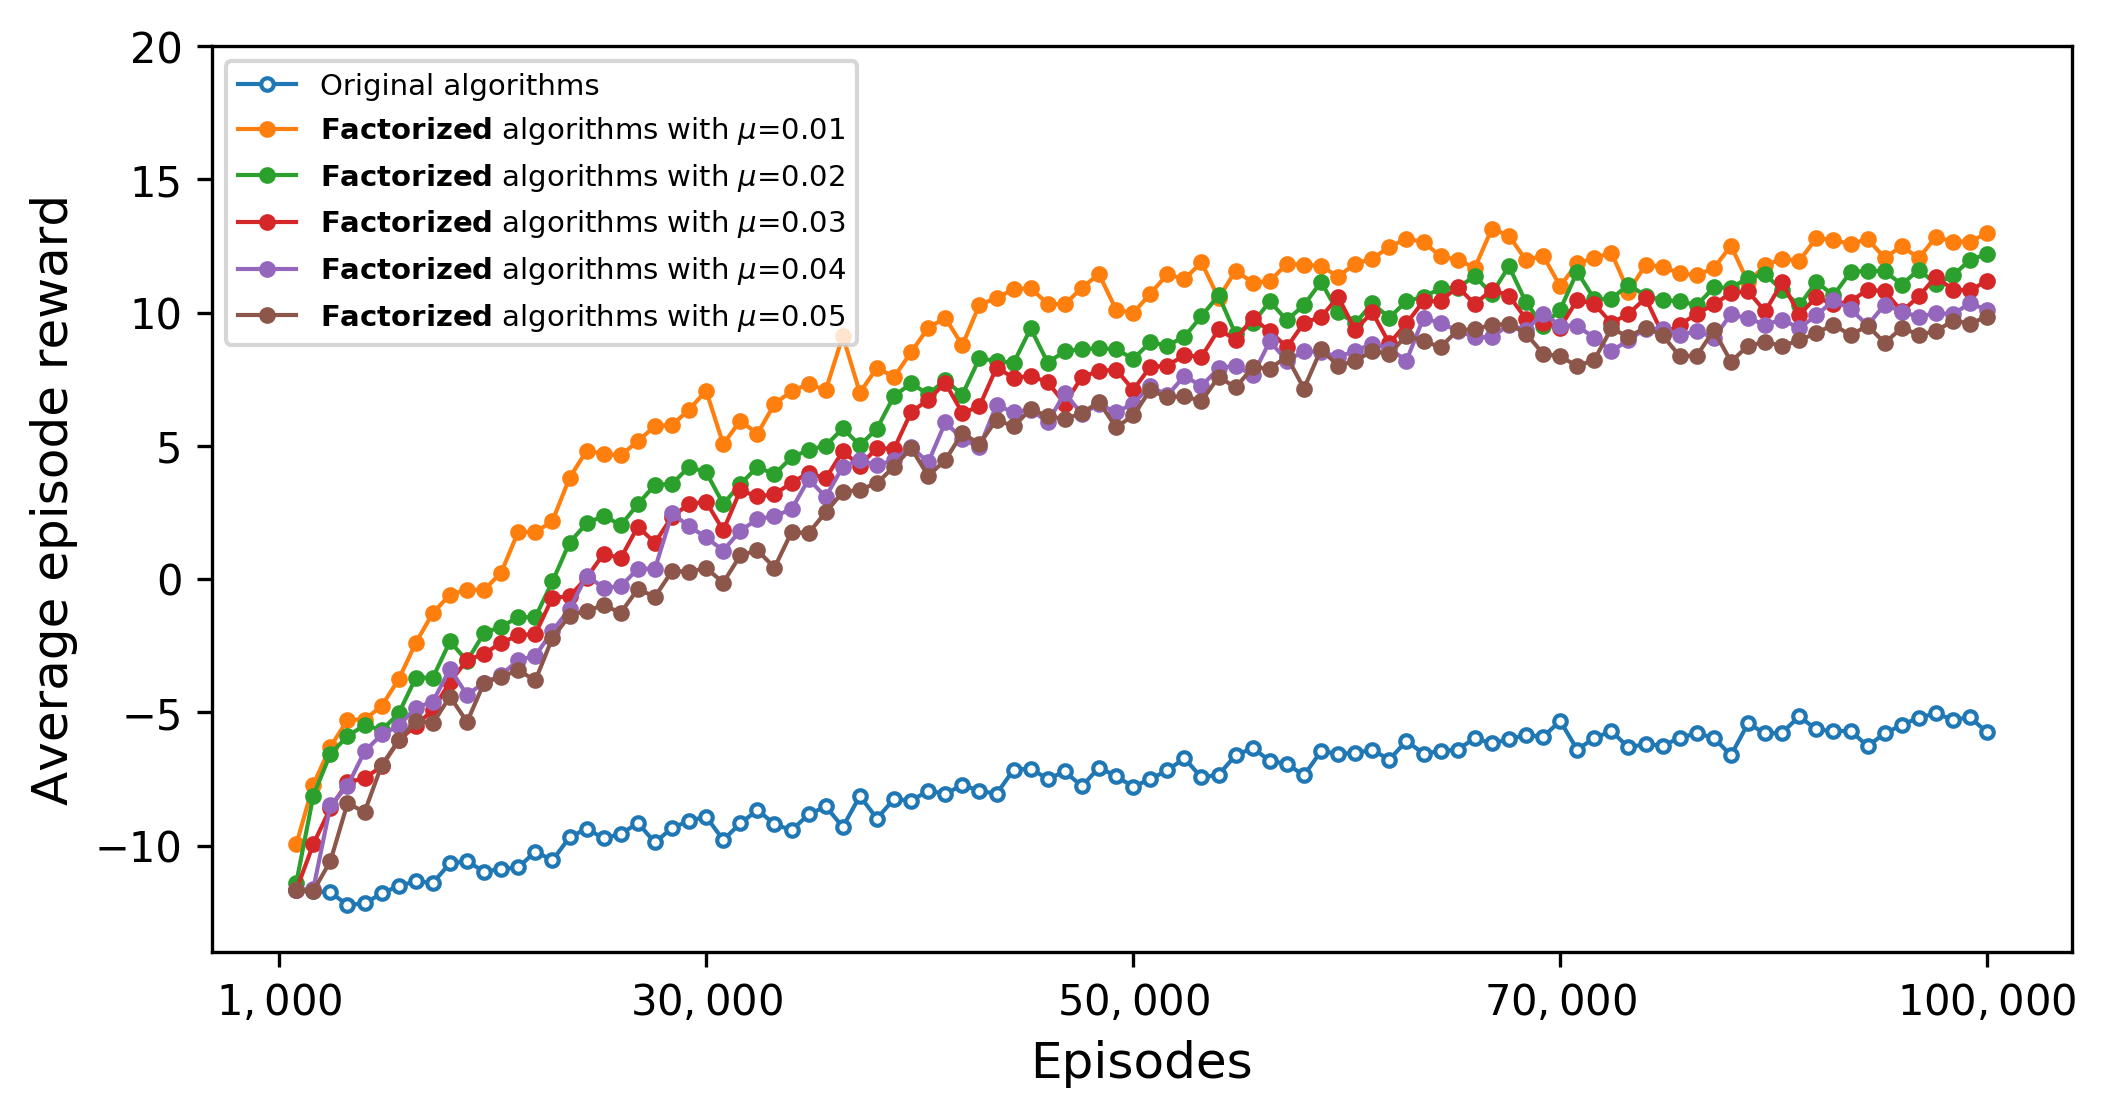

In [7]:
fig, ax1 = plt.subplots()
title_1 = 'rewards_mean'
title_2 = 'rewards_mean_fm'
ax1.set_ylabel('Average episode reward', fontsize=12)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])

avg_01 = avg_at[avg_at['at']==0.01]
avg_02 = avg_at[avg_at['at']==0.02]
avg_03 = avg_at[avg_at['at']==0.03]
avg_04 = avg_at[avg_at['at']==0.04]
avg_05 = avg_at[avg_at['at']==0.05]

ax1.plot(avg_01['interval'], avg_01[title_1], linewidth=1,marker='o', markersize=3,markerfacecolor='white',label='Original algorithms')
ax1.plot(avg_01['interval'], avg_01[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.01')
ax1.plot(avg_02['interval'], avg_02[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.02')
ax1.plot(avg_03['interval'], avg_03[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.03')
ax1.plot(avg_04['interval'], avg_04[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.04')
ax1.plot(avg_05['interval'], avg_05[title_2], linewidth=1,marker='o',markersize=3,label=r'$\bf{Factorized}$ ' + 'algorithms with' + r' $\mu$=0.05')

ax1.legend(prop={'size': 7},loc=2,ncol=1,numpoints = 1)
ax1.set_ylim([-14,20])
# plt.savefig('./AER_AT.eps',dpi=300)
plt.show()


### 0.01

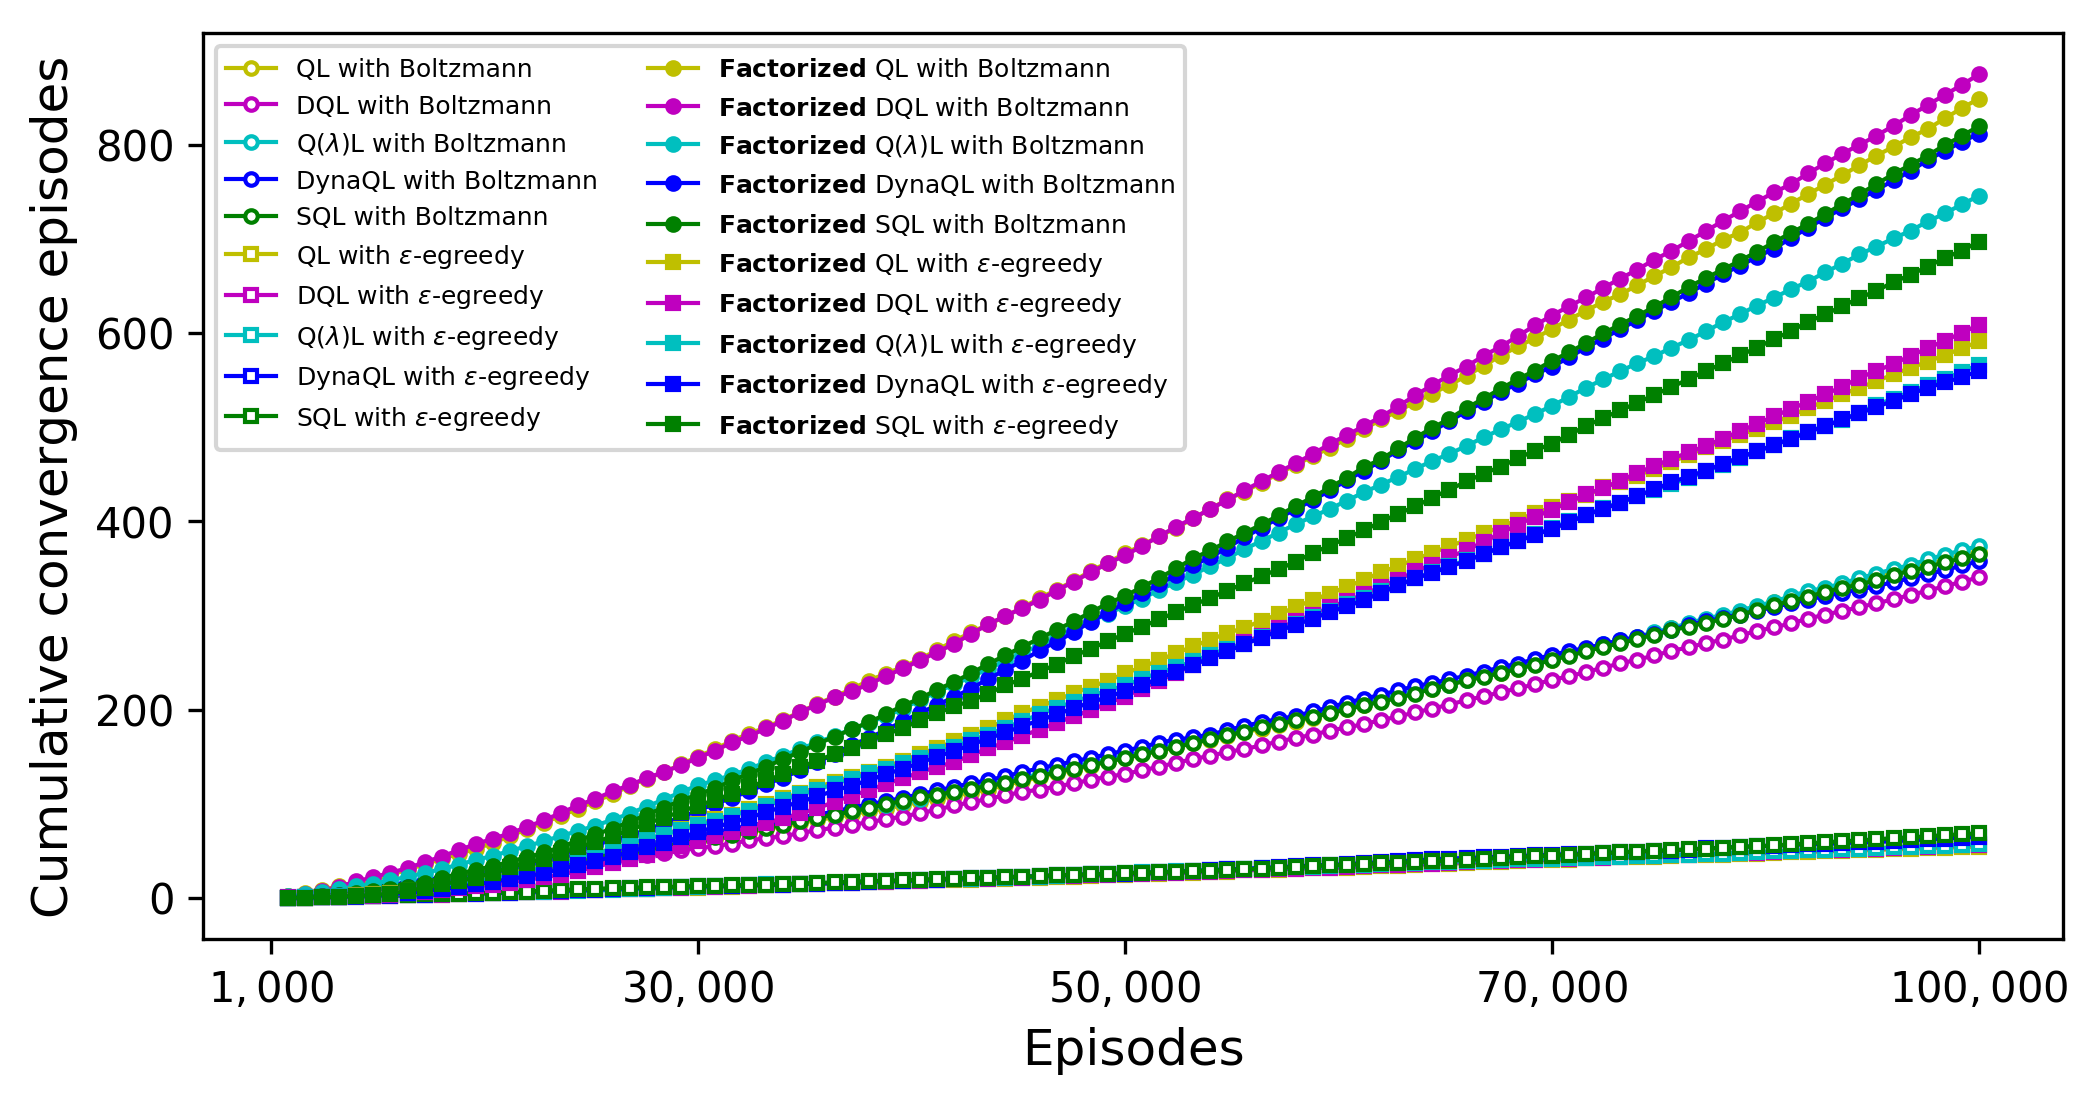

In [8]:
fig, ax1 = plt.subplots()
title_1 = 'conv_episodes_cum'
title_2 = 'conv_episodes_cum_fm'
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)

ax1.plot(b_01['interval'], b_01[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(b_dql_01['interval'], b_dql_01[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(b_lda_01['interval'], b_lda_01[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_01['interval'], b_dynaq_01[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(b_sql_01['interval'], b_sql_01[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')

ax1.plot(e_01['interval'], e_01[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_01['interval'], e_dql_01[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_01['interval'], e_lda_01[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_01['interval'], e_dynaq_01[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_01['interval'], e_sql_01[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')

ax1.plot(b_01['interval'], b_01[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with Boltzmann')
ax1.plot(b_dql_01['interval'], b_dql_01[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with Boltzmann')
ax1.plot(b_lda_01['interval'], b_lda_01[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_01['interval'], b_dynaq_01[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with Boltzmann')
ax1.plot(b_sql_01['interval'], b_sql_01[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')

ax1.plot(e_01['interval'], e_01[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_01['interval'], e_dql_01[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_01['interval'], e_lda_01[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_01['interval'], e_dynaq_01[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_01['interval'], e_sql_01[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 6},loc=2,ncol=2,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
# plt.savefig('./01_CCE.eps',dpi=300)
plt.show()


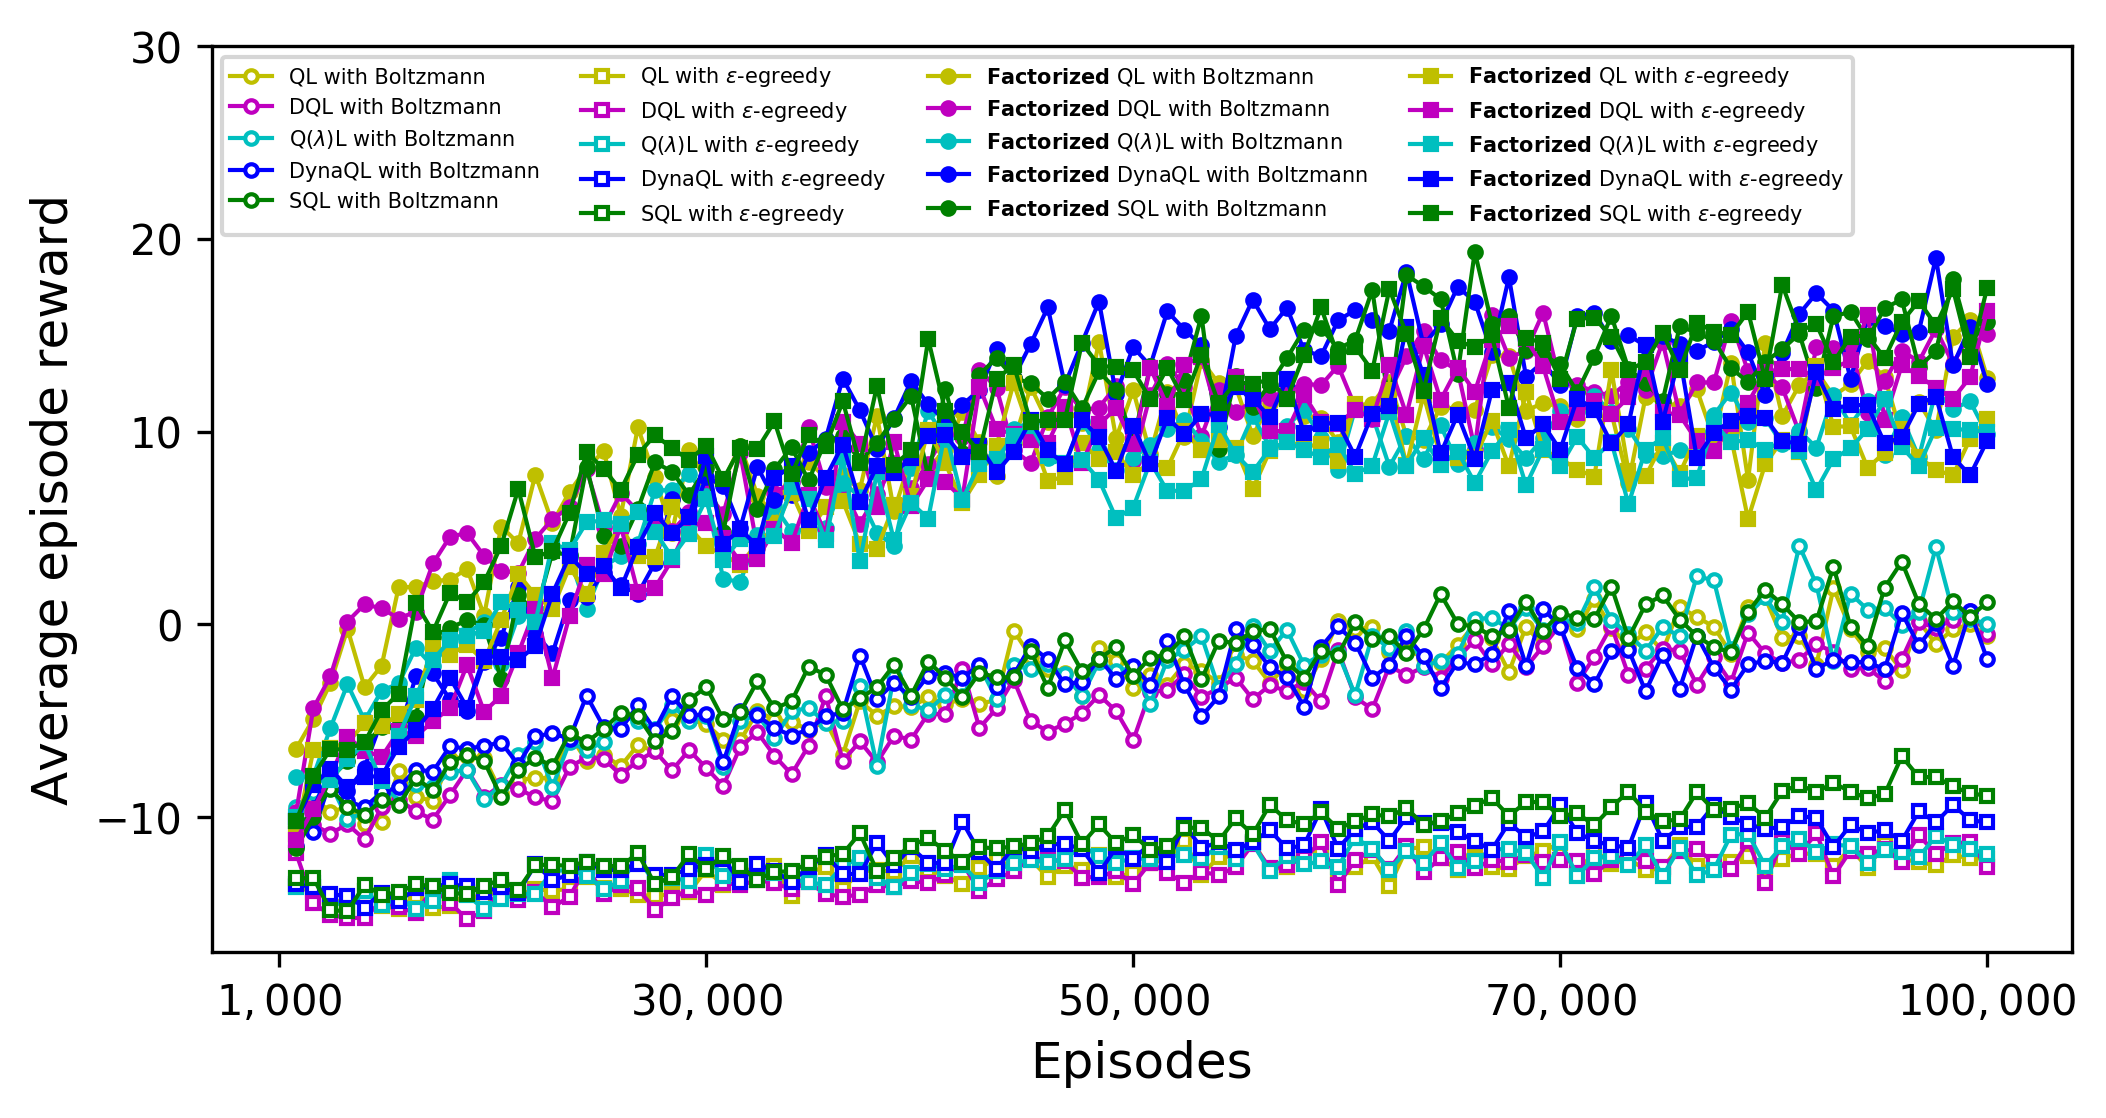

In [9]:
fig, ax1 = plt.subplots()
title_1 = 'rewards_mean'
title_2 = 'rewards_mean_fm'
ax1.set_ylabel('Average episode reward', fontsize=12)
ax1.set_ylim([-17,30])

ax1.plot(b_01['interval'], b_01[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(b_dql_01['interval'], b_dql_01[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(b_lda_01['interval'], b_lda_01[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_01['interval'], b_dynaq_01[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(b_sql_01['interval'], b_sql_01[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')

ax1.plot(e_01['interval'], e_01[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_01['interval'], e_dql_01[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_01['interval'], e_lda_01[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_01['interval'], e_dynaq_01[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_01['interval'], e_sql_01[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')

ax1.plot(b_01['interval'], b_01[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with Boltzmann')
ax1.plot(b_dql_01['interval'], b_dql_01[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with Boltzmann')
ax1.plot(b_lda_01['interval'], b_lda_01[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_01['interval'], b_dynaq_01[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with Boltzmann')
ax1.plot(b_sql_01['interval'], b_sql_01[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')

ax1.plot(e_01['interval'], e_01[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_01['interval'], e_dql_01[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_01['interval'], e_lda_01[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_01['interval'], e_dynaq_01[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_01['interval'], e_sql_01[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 5},loc=2,ncol=4,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
plt.savefig('./01_AER.eps',dpi=300)
plt.show()


### 0.02

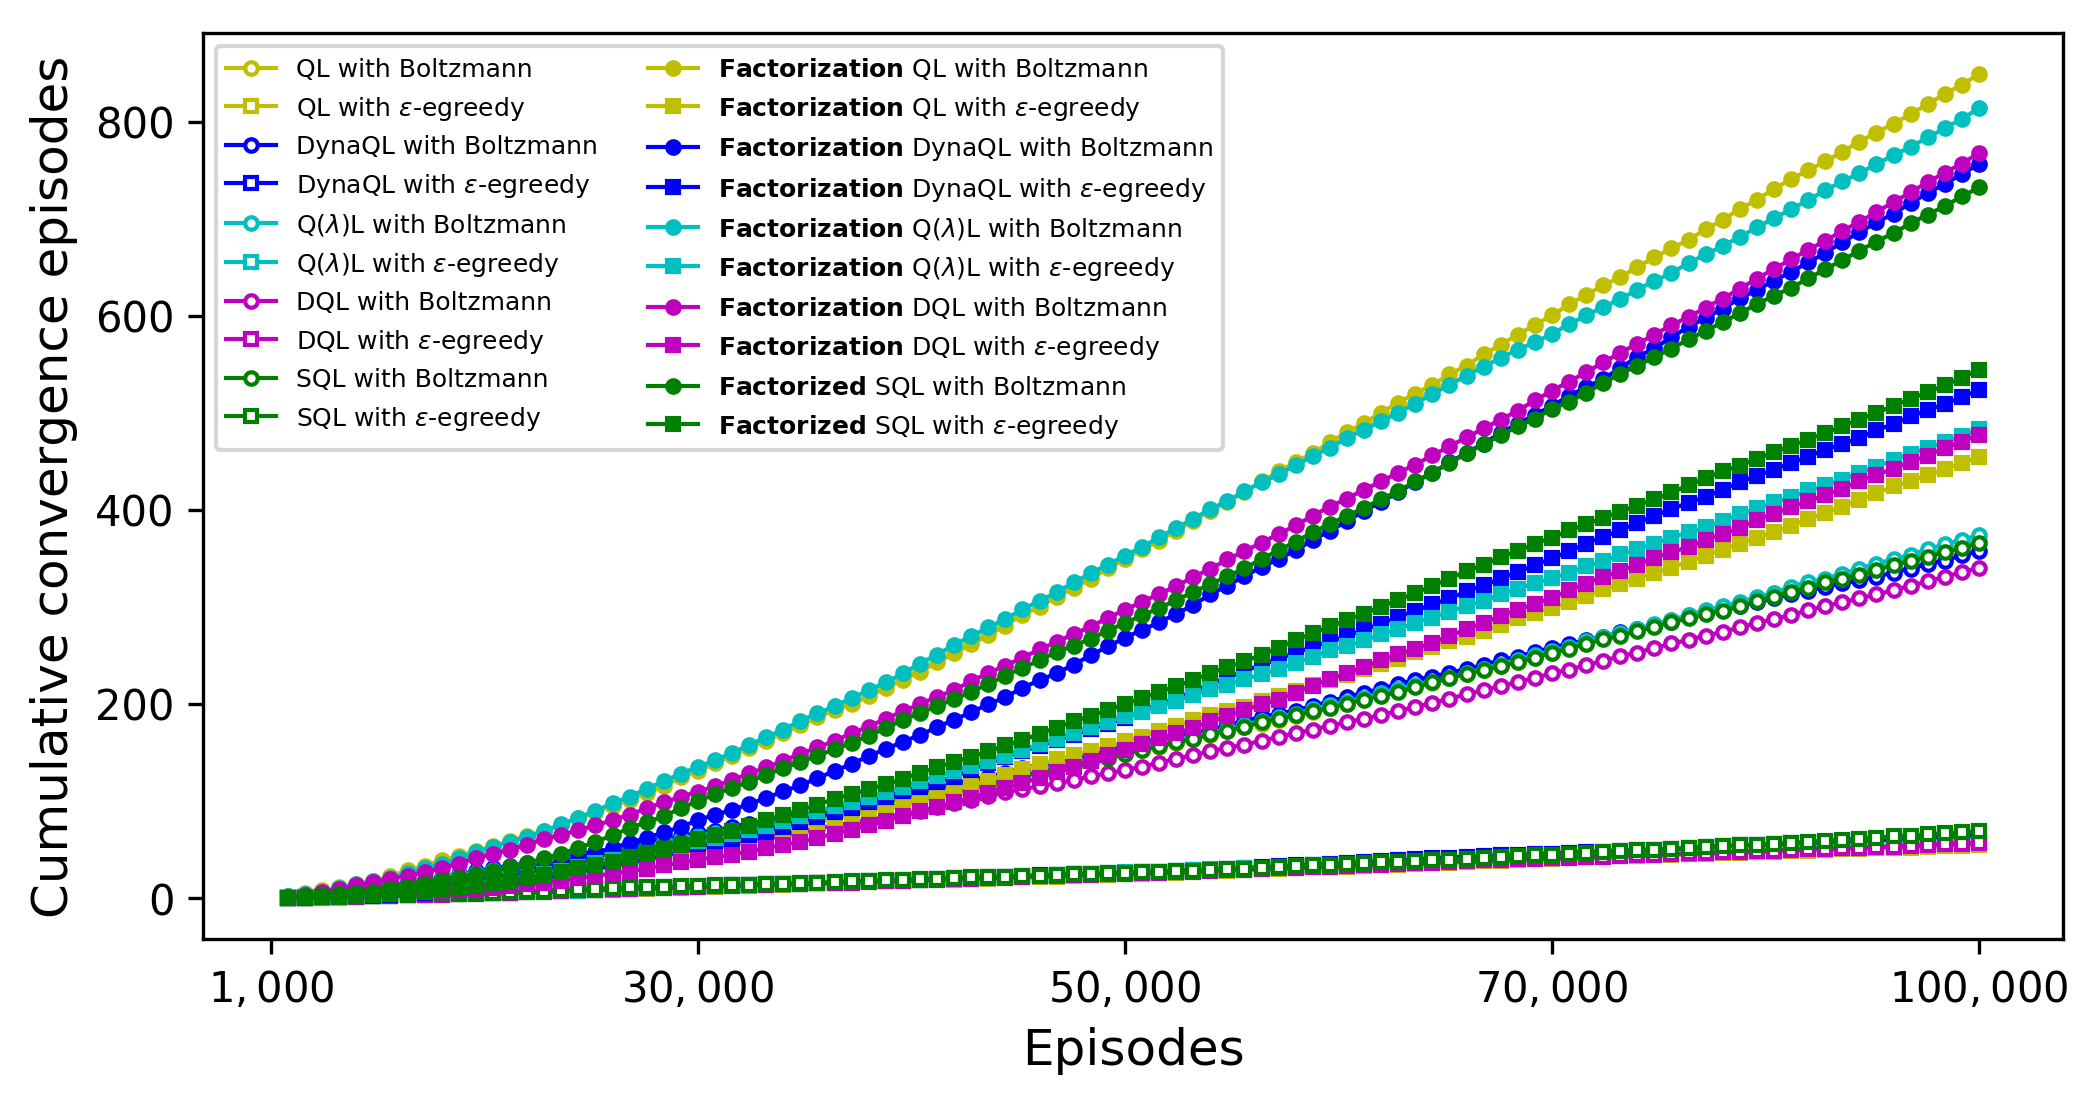

In [11]:
fig, ax1 = plt.subplots()
title_1 = 'conv_episodes_cum'
title_2 = 'conv_episodes_cum_fm'
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])

ax1.plot(b_02['interval'], b_02[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(e_02['interval'], e_02[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_02['interval'], b_dynaq_02[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(e_dynaq_02['interval'], e_dynaq_02[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_02['interval'], b_lda_02[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_02['interval'], e_lda_02[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_02['interval'], b_dql_02[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(e_dql_02['interval'], e_dql_02[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_02['interval'], b_sql_02[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')
ax1.plot(e_sql_02['interval'], e_sql_02[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')

ax1.plot(b_02['interval'], b_02[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with Boltzmann')
ax1.plot(e_02['interval'], e_02[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_02['interval'], b_dynaq_02[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with Boltzmann')
ax1.plot(e_dynaq_02['interval'], e_dynaq_02[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_02['interval'], b_lda_02[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_02['interval'], e_lda_02[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_02['interval'], b_dql_02[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with Boltzmann')
ax1.plot(e_dql_02['interval'], e_dql_02[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_02['interval'], b_sql_02[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')
ax1.plot(e_sql_02['interval'], e_sql_02[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 6},loc=2,ncol=2,numpoints = 1)
# plt.savefig('./02_CCE.eps',dpi=300)
plt.show()


In [12]:
fig, ax1 = plt.subplots()
title_1 = 'rewards_mean'
title_2 = 'rewards_mean_fm'
ax1.set_ylabel('Average episode reward', fontsize=12)
ax1.set_ylim([-17,30])

ax1.plot(b_02['interval'], b_02[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(b_dql_02['interval'], b_dql_02[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(b_lda_02['interval'], b_lda_02[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_02['interval'], b_dynaq_02[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(b_sql_02['interval'], b_sql_02[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')

ax1.plot(e_02['interval'], e_02[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_02['interval'], e_dql_02[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_02['interval'], e_lda_02[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_02['interval'], e_dynaq_02[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_02['interval'], e_sql_02[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')

ax1.plot(b_02['interval'], b_02[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with Boltzmann')
ax1.plot(b_dql_02['interval'], b_dql_02[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with Boltzmann')
ax1.plot(b_lda_02['interval'], b_lda_02[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_02['interval'], b_dynaq_02[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with Boltzmann')
ax1.plot(b_sql_02['interval'], b_sql_02[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')

ax1.plot(e_02['interval'], e_02[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_02['interval'], e_dql_02[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_02['interval'], e_lda_02[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_02['interval'], e_dynaq_02[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_02['interval'], e_sql_02[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 5},loc=2,ncol=4,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
# plt.savefig('./02_AER.eps',dpi=300)

plt.show()

### 0.03

In [13]:
fig, ax1 = plt.subplots()
title_1 = 'conv_episodes_cum'
title_2 = 'conv_episodes_cum_fm'
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)

ax1.plot(b_03['interval'], b_03[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(e_03['interval'], e_03[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_03['interval'], b_dynaq_03[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(e_dynaq_03['interval'], e_dynaq_03[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_03['interval'], b_lda_03[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_03['interval'], e_lda_03[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_03['interval'], b_dql_03[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(e_dql_03['interval'], e_dql_03[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_03['interval'], b_sql_03[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')
ax1.plot(e_sql_03['interval'], e_sql_03[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')


ax1.plot(b_03['interval'], b_03[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with Boltzmann')
ax1.plot(e_03['interval'], e_03[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_03['interval'], b_dynaq_03[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with Boltzmann')
ax1.plot(e_dynaq_03['interval'], e_dynaq_03[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_03['interval'], b_lda_03[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_03['interval'], e_lda_03[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_03['interval'], b_dql_03[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with Boltzmann')
ax1.plot(e_dql_03['interval'], e_dql_03[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_03['interval'], b_sql_03[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')
ax1.plot(e_sql_03['interval'], e_sql_03[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 6},loc=2,ncol=2,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
# plt.savefig('./03_CCE.eps',dpi=300)
plt.show()


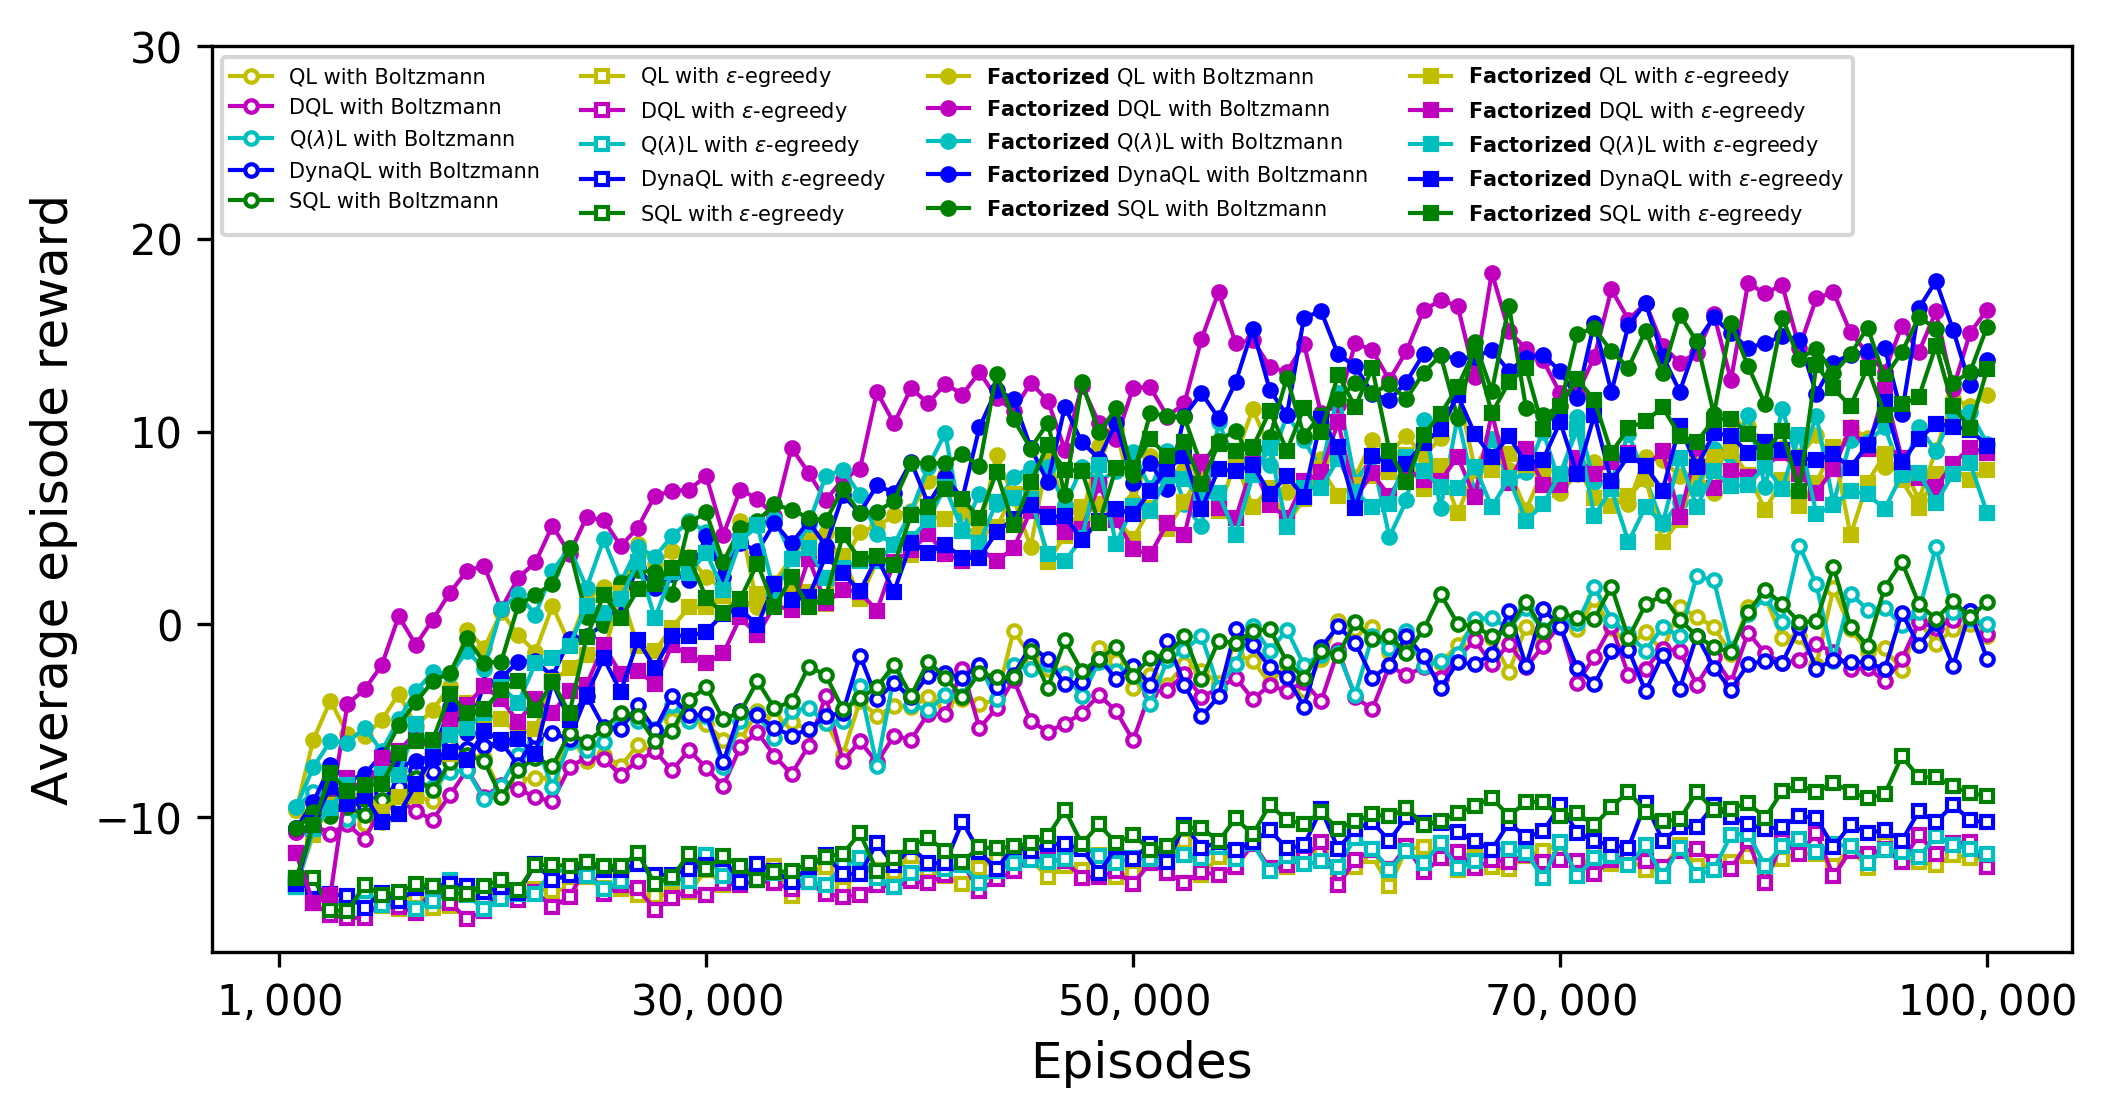

In [14]:
fig, ax1 = plt.subplots()
title_1 = 'rewards_mean'
title_2 = 'rewards_mean_fm'
ax1.set_ylabel('Average episode reward', fontsize=12)
ax1.set_ylim([-17,30])

ax1.plot(b_03['interval'], b_03[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(b_dql_03['interval'], b_dql_03[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(b_lda_03['interval'], b_lda_03[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_03['interval'], b_dynaq_03[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(b_sql_03['interval'], b_sql_03[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')

ax1.plot(e_03['interval'], e_03[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_03['interval'], e_dql_03[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_03['interval'], e_lda_03[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_03['interval'], e_dynaq_03[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_03['interval'], e_sql_03[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')

ax1.plot(b_03['interval'], b_03[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with Boltzmann')
ax1.plot(b_dql_03['interval'], b_dql_03[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with Boltzmann')
ax1.plot(b_lda_03['interval'], b_lda_03[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_03['interval'], b_dynaq_03[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with Boltzmann')
ax1.plot(b_sql_03['interval'], b_sql_03[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')

ax1.plot(e_03['interval'], e_03[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_03['interval'], e_dql_03[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_03['interval'], e_lda_03[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_03['interval'], e_dynaq_03[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_03['interval'], e_sql_03[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 5},loc=2,ncol=4,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
# plt.savefig('./03_AER.eps',dpi=300)
plt.show()


### 0.04

In [15]:
fig, ax1 = plt.subplots()
title_1 = 'conv_episodes_cum'
title_2 = 'conv_episodes_cum_fm'
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)

ax1.plot(b_04['interval'], b_04[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(e_04['interval'], e_04[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_04['interval'], b_dynaq_04[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(e_dynaq_04['interval'], e_dynaq_04[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_04['interval'], b_lda_04[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_04['interval'], e_lda_04[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_04['interval'], b_dql_04[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(e_dql_04['interval'], e_dql_04[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_04['interval'], b_sql_04[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')
ax1.plot(e_sql_04['interval'], e_sql_04[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')


ax1.plot(b_04['interval'], b_04[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with Boltzmann')
ax1.plot(e_04['interval'], e_04[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_04['interval'], b_dynaq_04[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with Boltzmann')
ax1.plot(e_dynaq_04['interval'], e_dynaq_04[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_04['interval'], b_lda_04[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_04['interval'], e_lda_04[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_04['interval'], b_dql_04[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with Boltzmann')
ax1.plot(e_dql_04['interval'], e_dql_04[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_04['interval'], b_sql_04[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')
ax1.plot(e_sql_04['interval'], e_sql_04[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 6},loc=2,ncol=2,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
# plt.savefig('./04_CCE.eps',dpi=300)
plt.show()


In [ ]:
fig, ax1 = plt.subplots()
title_1 = 'rewards_mean'
title_2 = 'rewards_mean_fm'
ax1.set_ylabel('Average episode reward', fontsize=12)
ax1.set_ylim([-17,30])

ax1.plot(b_04['interval'], b_04[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(b_dql_04['interval'], b_dql_04[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(b_lda_04['interval'], b_lda_04[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_04['interval'], b_dynaq_04[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(b_sql_04['interval'], b_sql_04[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')

ax1.plot(e_04['interval'], e_04[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_04['interval'], e_dql_04[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_04['interval'], e_lda_04[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_04['interval'], e_dynaq_04[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_04['interval'], e_sql_04[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')

ax1.plot(b_04['interval'], b_04[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with Boltzmann')
ax1.plot(b_dql_04['interval'], b_dql_04[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with Boltzmann')
ax1.plot(b_lda_04['interval'], b_lda_04[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_04['interval'], b_dynaq_04[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with Boltzmann')
ax1.plot(b_sql_04['interval'], b_sql_04[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')

ax1.plot(e_04['interval'], e_04[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_04['interval'], e_dql_04[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_04['interval'], e_lda_04[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_04['interval'], e_dynaq_04[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_04['interval'], e_sql_04[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 5},loc=2,ncol=4,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
# ax1.set_ylabel('Average valid actions per episode', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
plt.savefig('./04_AER.eps',dpi=300)
plt.show()

### 0.05

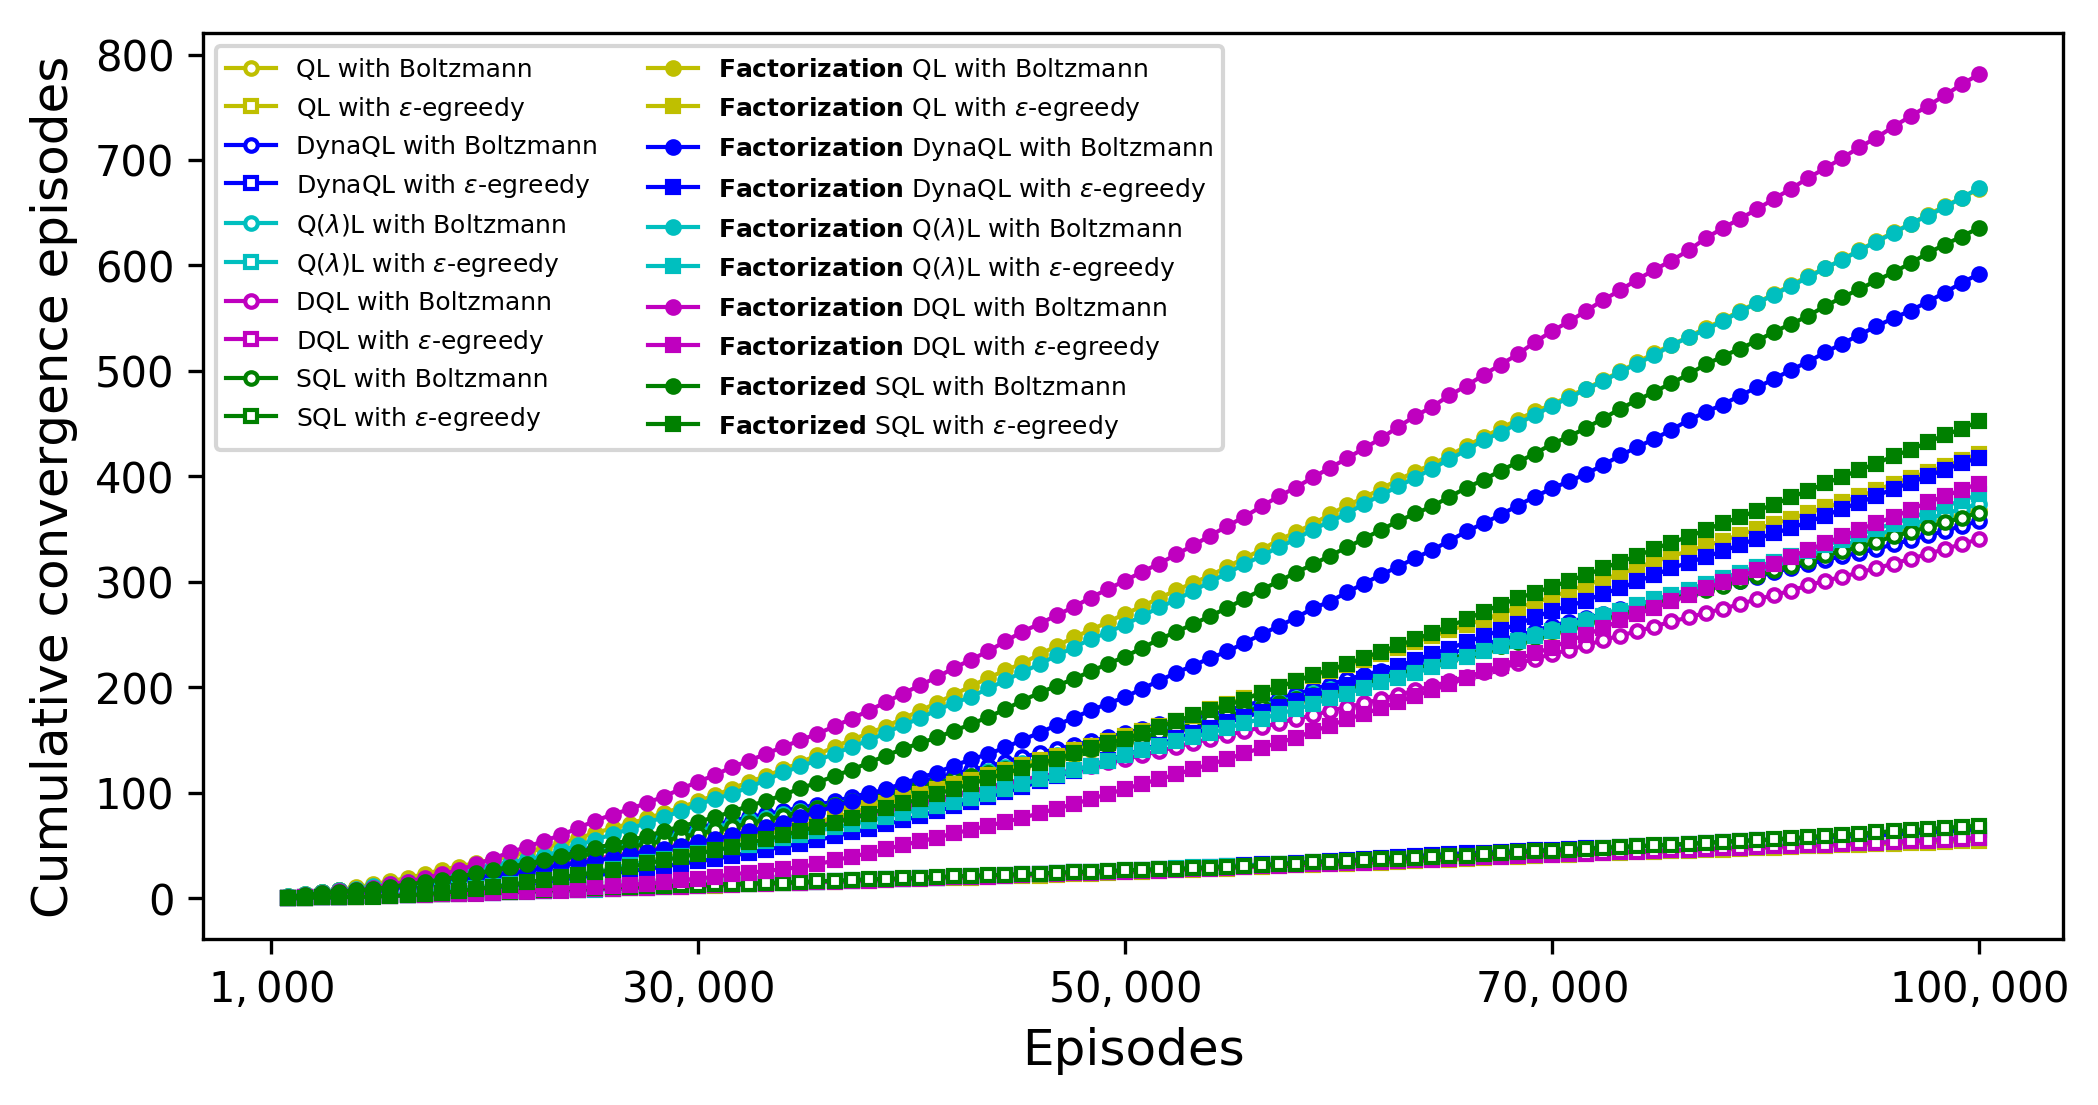

In [16]:
fig, ax1 = plt.subplots()
title_1 = 'conv_episodes_cum'
title_2 = 'conv_episodes_cum_fm'
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)

ax1.plot(b_05['interval'], b_05[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(e_05['interval'], e_05[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_05['interval'], b_dynaq_05[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(e_dynaq_05['interval'], e_dynaq_05[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_05['interval'], b_lda_05[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_05['interval'], e_lda_05[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_05['interval'], b_dql_05[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(e_dql_05['interval'], e_dql_05[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_05['interval'], b_sql_05[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')
ax1.plot(e_sql_05['interval'], e_sql_05[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')


ax1.plot(b_05['interval'], b_05[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with Boltzmann')
ax1.plot(e_05['interval'], e_05[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorization}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dynaq_05['interval'], b_dynaq_05[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with Boltzmann')
ax1.plot(e_dynaq_05['interval'], e_dynaq_05[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorization}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_lda_05['interval'], b_lda_05[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(e_lda_05['interval'], e_lda_05[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorization}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(b_dql_05['interval'], b_dql_05[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with Boltzmann')
ax1.plot(e_dql_05['interval'], e_dql_05[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorization}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(b_sql_05['interval'], b_sql_05[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')
ax1.plot(e_sql_05['interval'], e_sql_05[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 6},loc=2,ncol=2,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
# plt.savefig('./05_CCE.eps',dpi=300)
plt.show()


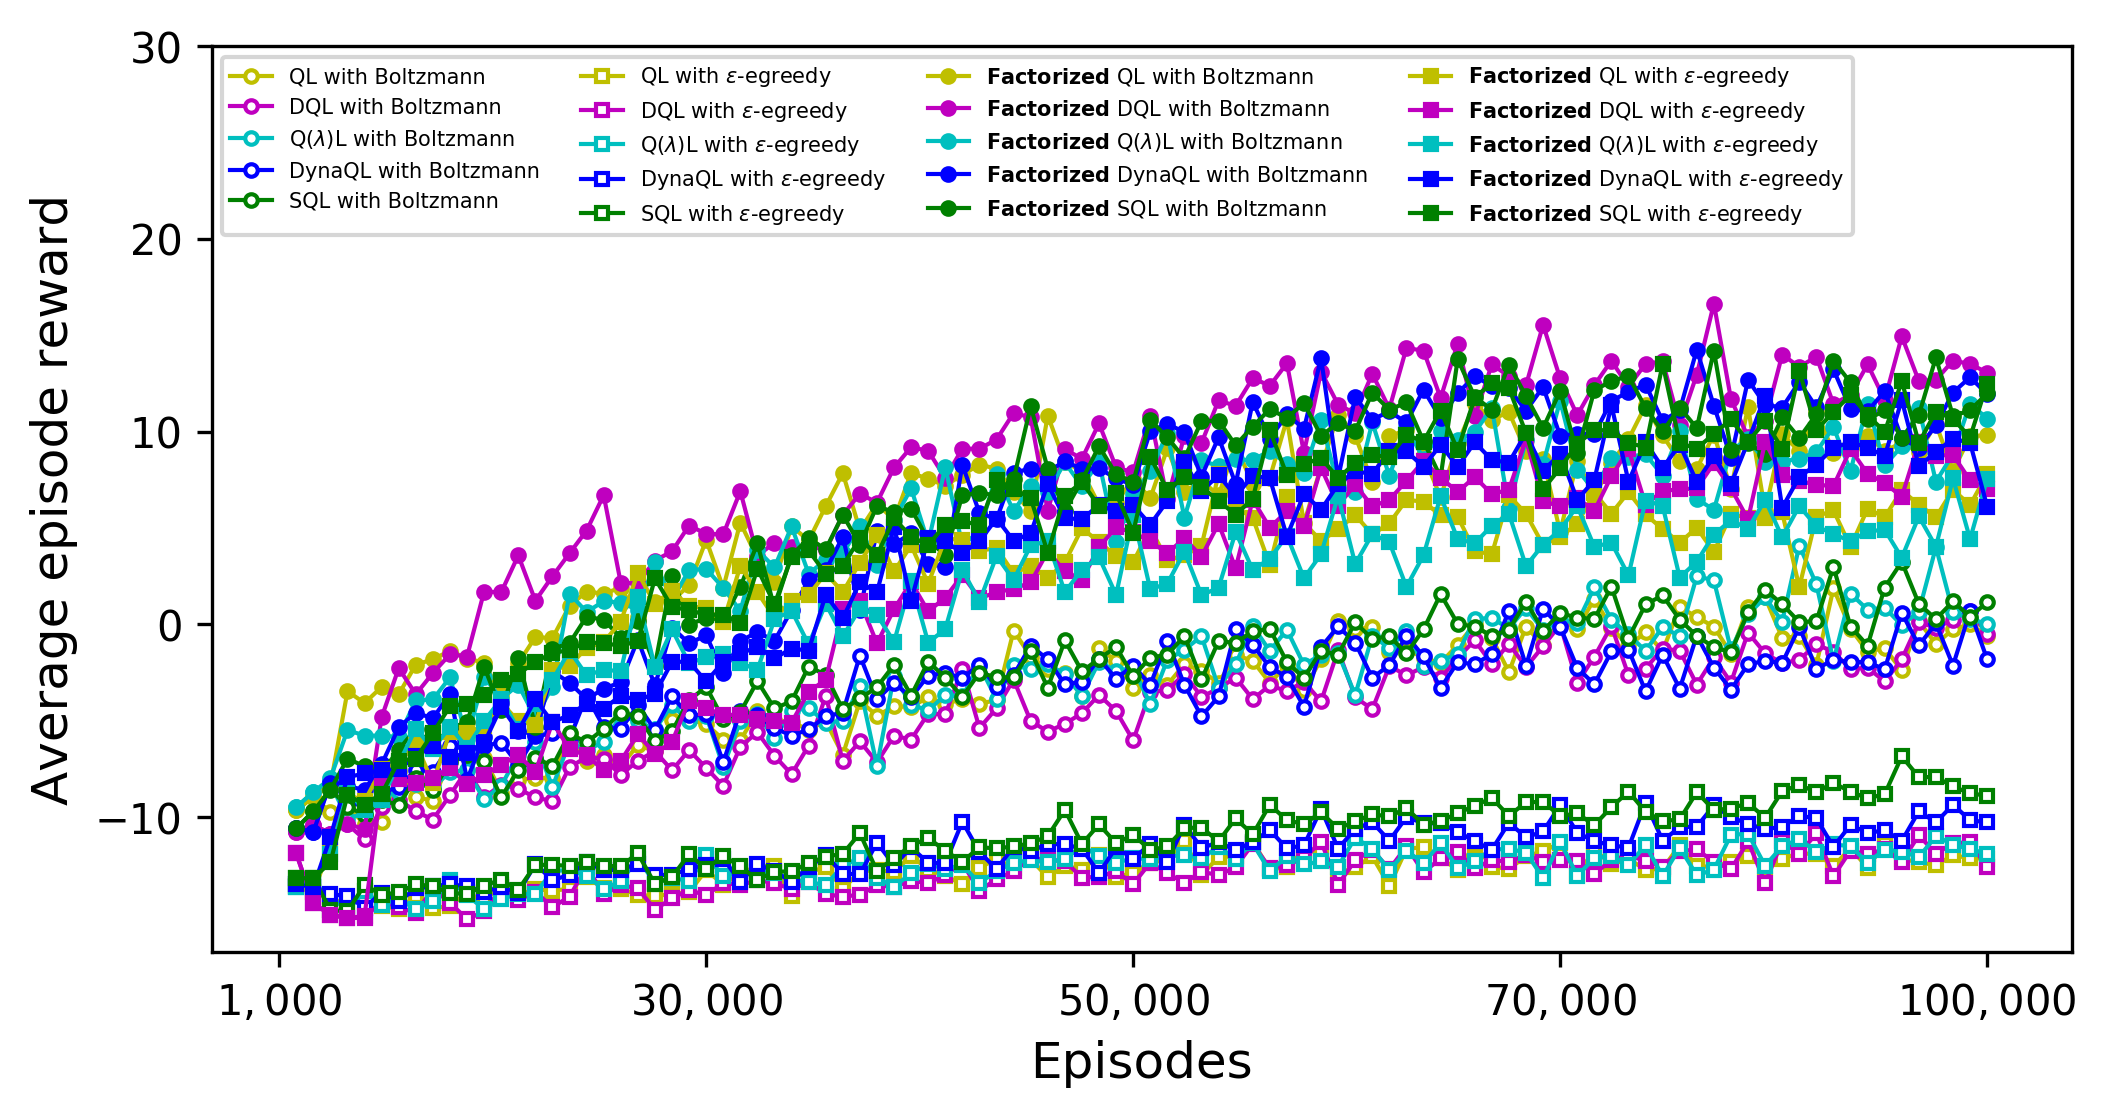

In [17]:
fig, ax1 = plt.subplots()
title_1 = 'rewards_mean'
title_2 = 'rewards_mean_fm'
ax1.set_ylabel('Average episode reward', fontsize=12)
ax1.set_ylim([-17,30])

ax1.plot(b_05['interval'], b_05[title_1], linewidth=1,marker='o',color='y', markersize=3,markerfacecolor='white',label='QL with Boltzmann')
ax1.plot(b_dql_05['interval'], b_dql_05[title_1], linewidth=1,marker='o',color='m',markersize=3,markerfacecolor='white',label='DQL with Boltzmann')
ax1.plot(b_lda_05['interval'], b_lda_05[title_1], linewidth=1,marker='o',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_05['interval'], b_dynaq_05[title_1], linewidth=1,marker='o',color='b',markersize=3,markerfacecolor='white',label='DynaQL with Boltzmann')
ax1.plot(b_sql_05['interval'], b_sql_05[title_1], linewidth=1,marker='o',color='g',markersize=3,markerfacecolor='white',label='SQL with Boltzmann')

ax1.plot(e_05['interval'], e_05[title_1], linewidth=1,marker='s',color='y',markersize=3,markerfacecolor='white',label='QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_05['interval'], e_dql_05[title_1], linewidth=1,marker='s',color='m',markersize=3,markerfacecolor='white',label='DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_05['interval'], e_lda_05[title_1], linewidth=1,marker='s',color='c',markersize=3,markerfacecolor='white',label='Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_05['interval'], e_dynaq_05[title_1], linewidth=1,marker='s',color='b',markersize=3,markerfacecolor='white',label='DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_05['interval'], e_sql_05[title_1], linewidth=1,marker='s',color='g',markersize=3,markerfacecolor='white',label='SQL with ' + r'$\epsilon$-egreedy')

ax1.plot(b_05['interval'], b_05[title_2], linewidth=1,marker='o',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with Boltzmann')
ax1.plot(b_dql_05['interval'], b_dql_05[title_2], linewidth=1,marker='o',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with Boltzmann')
ax1.plot(b_lda_05['interval'], b_lda_05[title_2], linewidth=1,marker='o',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with Boltzmann')
ax1.plot(b_dynaq_05['interval'], b_dynaq_05[title_2], linewidth=1,marker='o',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with Boltzmann')
ax1.plot(b_sql_05['interval'], b_sql_05[title_2], linewidth=1,marker='o',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with Boltzmann')

ax1.plot(e_05['interval'], e_05[title_2], linewidth=1,marker='s',color='y',markersize=3,label=r'$\bf{Factorized}$ ' + 'QL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dql_05['interval'], e_dql_05[title_2], linewidth=1,marker='s',color='m',markersize=3,label=r'$\bf{Factorized}$ ' + 'DQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_lda_05['interval'], e_lda_05[title_2], linewidth=1,marker='s',color='c',markersize=3,label=r'$\bf{Factorized}$ ' + 'Q('+'$\lambda$)L with ' + r'$\epsilon$-egreedy')
ax1.plot(e_dynaq_05['interval'], e_dynaq_05[title_2], linewidth=1,marker='s',color='b',markersize=3,label=r'$\bf{Factorized}$ ' + 'DynaQL with ' + r'$\epsilon$-egreedy')
ax1.plot(e_sql_05['interval'], e_sql_05[title_2], linewidth=1,marker='s',color='g',markersize=3,label=r'$\bf{Factorized}$ ' + 'SQL with ' + r'$\epsilon$-egreedy')

ax1.legend(prop={'size': 5},loc=2,ncol=4,numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$1,000$', r'$30,000$', r'$50,000$', r'$70,000$', r'$100,000$'])
# plt.savefig('./05_AER.eps',dpi=300)
plt.show()